In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [68]:
class SVM:
    
    def __init__(self,learning_rate = 0.001, lambda_param = 0.01, n_iters=100, verbose =1 ):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.verbose = verbose
    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0,-1,1)

        self.w = np.random.rand(n_features)
        self.b = np.random.rand()

        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i,self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr* (2*self.lambda_param * self.w)
                else:
                    self.w -= self.lr*(2 * self.lambda_param * self.w - np.dot(x_i,y_[idx]))
                    self.b -= self.lr * y_[idx]
                if self.verbose == 1 and i% 1000 == 0 :
                    loss = []
                    for idx, x_i in enumerate(X):
                        loss.append(max(0,1- y_[idx]* (np.dot(self.w,x_i)-self.b)))
                    loss = sum(loss)/n_samples
                    J = self.lambda_param * np.dot(self.w,self.w) + loss
                    print('loss J : ',J)
                        
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [88]:
X = np.random.rand(10,2)
y = np.random.uniform(-1,1, size = (10,))
y_ = np.where(y<= 0, -1,1)
X_test = np.random.randn(2)

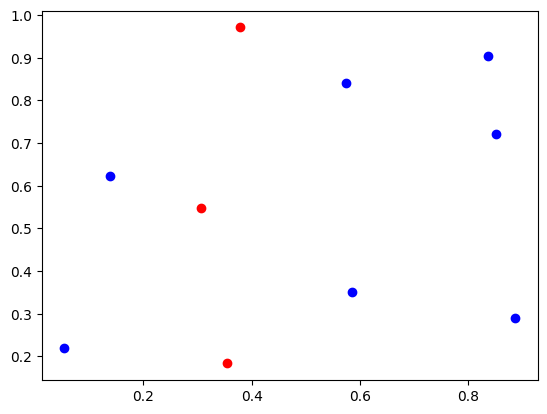

In [89]:
X_neg = X[y_==-1]
X_pos = X[y_==1]

# Plot positive and negative examples
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='Positive')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Negative')


In [93]:
print(model.w)
print(model.b)

[0.29788391 0.65447717]
-0.2984519395300342


In [90]:
model = SVM(verbose = 0)
model.fit(X,y)


1.0